In [75]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [10]:
#Step 1: Choose 7 assets (I choose the same from previous project)

assets = ['AAPL', 'C', 'AMZN', 'DIS', 'NVDA', 'UNH', 'MSFT']

#Step 2: Retrieve daily open or close data on your assets for the previous 2 years

data = yf.download(assets, period = '2y')['Adj Close']

data_ret = data.pct_change()
d1 = len(assets)

[*********************100%***********************]  7 of 7 completed


In [106]:
#Step 3:Calculate the mean, variance, and correlation matrix for all assets

data_tab = pd.DataFrame(index = assets)
data_tab['Variance'] = (data_ret*100).var()
data_tab['Mean'] = data_ret.mean()

data_tab

,Variance,Mean
AAPL,3.521821,0.000466
C,3.450029,-0.000846
AMZN,7.269949,-0.000083
DIS,4.139122,-0.001280
NVDA,13.797870,0.001610
UNH,2.116194,0.000469
MSFT,3.808442,0.000273


In [78]:
data_ret.corr()

,AAPL,AMZN,C,DIS,MSFT,NVDA,UNH
AAPL,1.000000,0.617238,0.441145,0.550598,0.740116,0.653612,0.358666
AMZN,0.617238,1.000000,0.406452,0.573245,0.685113,0.598726,0.193123
C,0.441145,0.406452,1.000000,0.529877,0.382835,0.417476,0.253861
DIS,0.550598,0.573245,0.529877,1.000000,0.524105,0.496576,0.210185
MSFT,0.740116,0.685113,0.382835,0.524105,1.000000,0.694175,0.328851
NVDA,0.653612,0.598726,0.417476,0.496576,0.694175,1.000000,0.197700
UNH,0.358666,0.193123,0.253861,0.210185,0.328851,0.197700,1.000000


In [119]:
#Step 4: Calculate efficient fronntier and optimal weights for your portfolio

def ret(w):
    return np.sum(data_ret.mean() * w) * 252
def vol(w):
    return np.sqrt(np.dot(weights.T, np.dot(data_ret.cov() * 252, w)))

In [125]:
efrets = []
efvols = []
efwt = []

for p in range (25000):    
    weights = np.random.random(d1)                  
    weights /= np.sum(weights)    
    efwt.append(weights)
    efrets.append(ret(weights)) 
    efvols.append(vol(weights))
    
efrets = np.array(efrets)
efvols = np.array(efvols)

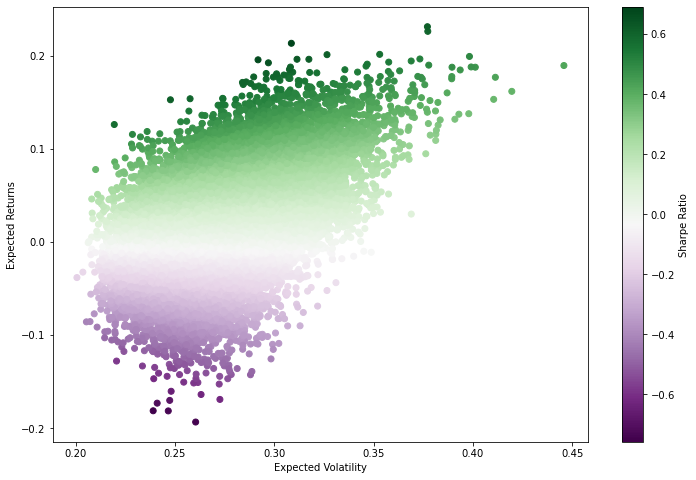

In [32]:
#step 5: Use MatPlotLib or Seaborn libraries to graph the results (matrix and frontier)
sharpe = efrets/efvols
plt.figure(figsize=(12,8))
plt.scatter(efvols,efrets, c=sharpe, marker='o', cmap ='PRGn')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio');

In [28]:
#Step 6: Output the calculated optimal weighting
high_SR = np.array(sharpe).argmax()
opt_w = np.array(efwt)[high_SR]
max_ret = efrets[high_SR]
max_vol = efvols[high_SR]

data_tab2 = pd.DataFrame({'Optimal' : opt_w}, index = assets)

data_tab2

,Optimal
AAPL,0.148514
C,0.019185
AMZN,0.006396
DIS,0.005843
NVDA,0.080521
UNH,0.370326
MSFT,0.369214


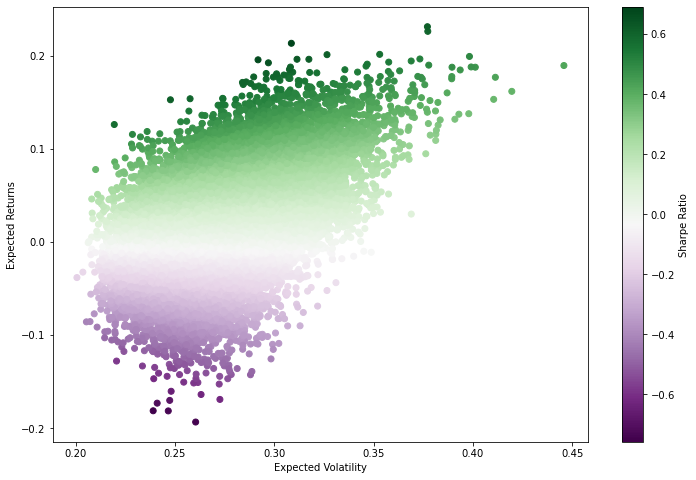

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(efvols,efrets, c=sharpe, marker='o', cmap ='PRGn')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio');